In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting

from sklearn.metrics import roc_curve
import os # accessing directory structure
import numpy as np
import pandas as pd
import os
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

import seaborn as sns

# from pandas_datareader import data
from sklearn.metrics import classification_report
import datetime as dt
import urllib.request, json

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import BayesianRidge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy import sqrt


from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import itertools  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [2]:
os.chdir(r"F:\uOttawa Winter 20\Data Mining\Project")
data = pd.read_csv("dow_jones_index.data")

In [3]:
data.isnull().sum()

quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64

In [4]:
data = data.dropna()

In [5]:
data.shape

(720, 16)

Creating a binary column "Price", if the % change for next week price is +, then it's 1, else 0



In [6]:
data['price'] = np.where(data['percent_change_next_weeks_price']>0, '1', '0')

In [7]:
cols = ["open","close","high","low","volume","percent_change_price","percent_change_volume_over_last_wk","previous_weeks_volume",
"days_to_next_dividend","percent_return_next_dividend","price"]

In [8]:
df = data[cols]
print(df.shape)

(720, 11)


##### Removing dollar sign from the columns

In [9]:
df['open'] = df.open.str.replace('$' , '')
df['close'] = df.close.str.replace('$' , '')
df['low'] = df.low.str.replace('$' , '')
df['high'] = df.high.str.replace('$' , '')

data['open'] = data.open.str.replace('$' , '')
data['close'] = data.close.str.replace('$' , '')
data['low'] = data.low.str.replace('$' , '')
data['high'] = data.high.str.replace('$' , '')
data['next_weeks_open'] = data.next_weeks_open.str.replace('$' , '')
data['next_weeks_close'] = data.next_weeks_close.str.replace('$' , '')

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [10]:
# Convert to numeric values
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 1 to 749
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   open                                720 non-null    float64
 1   close                               720 non-null    float64
 2   high                                720 non-null    float64
 3   low                                 720 non-null    float64
 4   volume                              720 non-null    int64  
 5   percent_change_price                720 non-null    float64
 6   percent_change_volume_over_last_wk  720 non-null    float64
 7   previous_weeks_volume               720 non-null    float64
 8   days_to_next_dividend               720 non-null    int64  
 9   percent_return_next_dividend        720 non-null    float64
 10  price                               720 non-null    int64  
dtypes: float64(8), int64(3)
memory usage: 67.5 KB

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Normalizing the data

In [13]:
from sklearn.preprocessing import StandardScaler
cols_to_norm = ["open","close","high","low","volume","percent_change_price","percent_change_volume_over_last_wk","previous_weeks_volume",
"days_to_next_dividend","percent_return_next_dividend"]
df[cols_to_norm] = StandardScaler().fit_transform(df[cols_to_norm])

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [14]:
  df.head()

,open,close,high,low,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,days_to_next_dividend,percent_return_next_dividend,price
1,-1.131237,-1.150557,-1.141611,-1.151237,0.838008,-1.781209,-0.103995,0.768393,-0.725401,-1.652248,0
2,-1.147119,-1.156028,-1.151510,-1.152479,0.150182,-0.999062,-1.200005,0.789181,-0.878073,-1.645222,1
3,-1.156892,-1.145694,-1.144011,-1.145650,0.235396,0.642459,0.092851,0.132231,-1.030744,-1.658359,1
4,-1.147424,-1.114996,-1.121211,-1.134475,0.255192,2.358274,-0.089008,0.213620,0.975795,-1.694309,1
5,-1.112300,-1.108006,-1.118511,-1.109953,-0.006006,0.080168,-0.772691,0.232527,0.823123,-1.701909,0


In [15]:
Y=df['price']

In [16]:
df=df.drop(['price'], axis=1)
Output=pd.DataFrame(Y)
X=df

#### Correlation Analysis

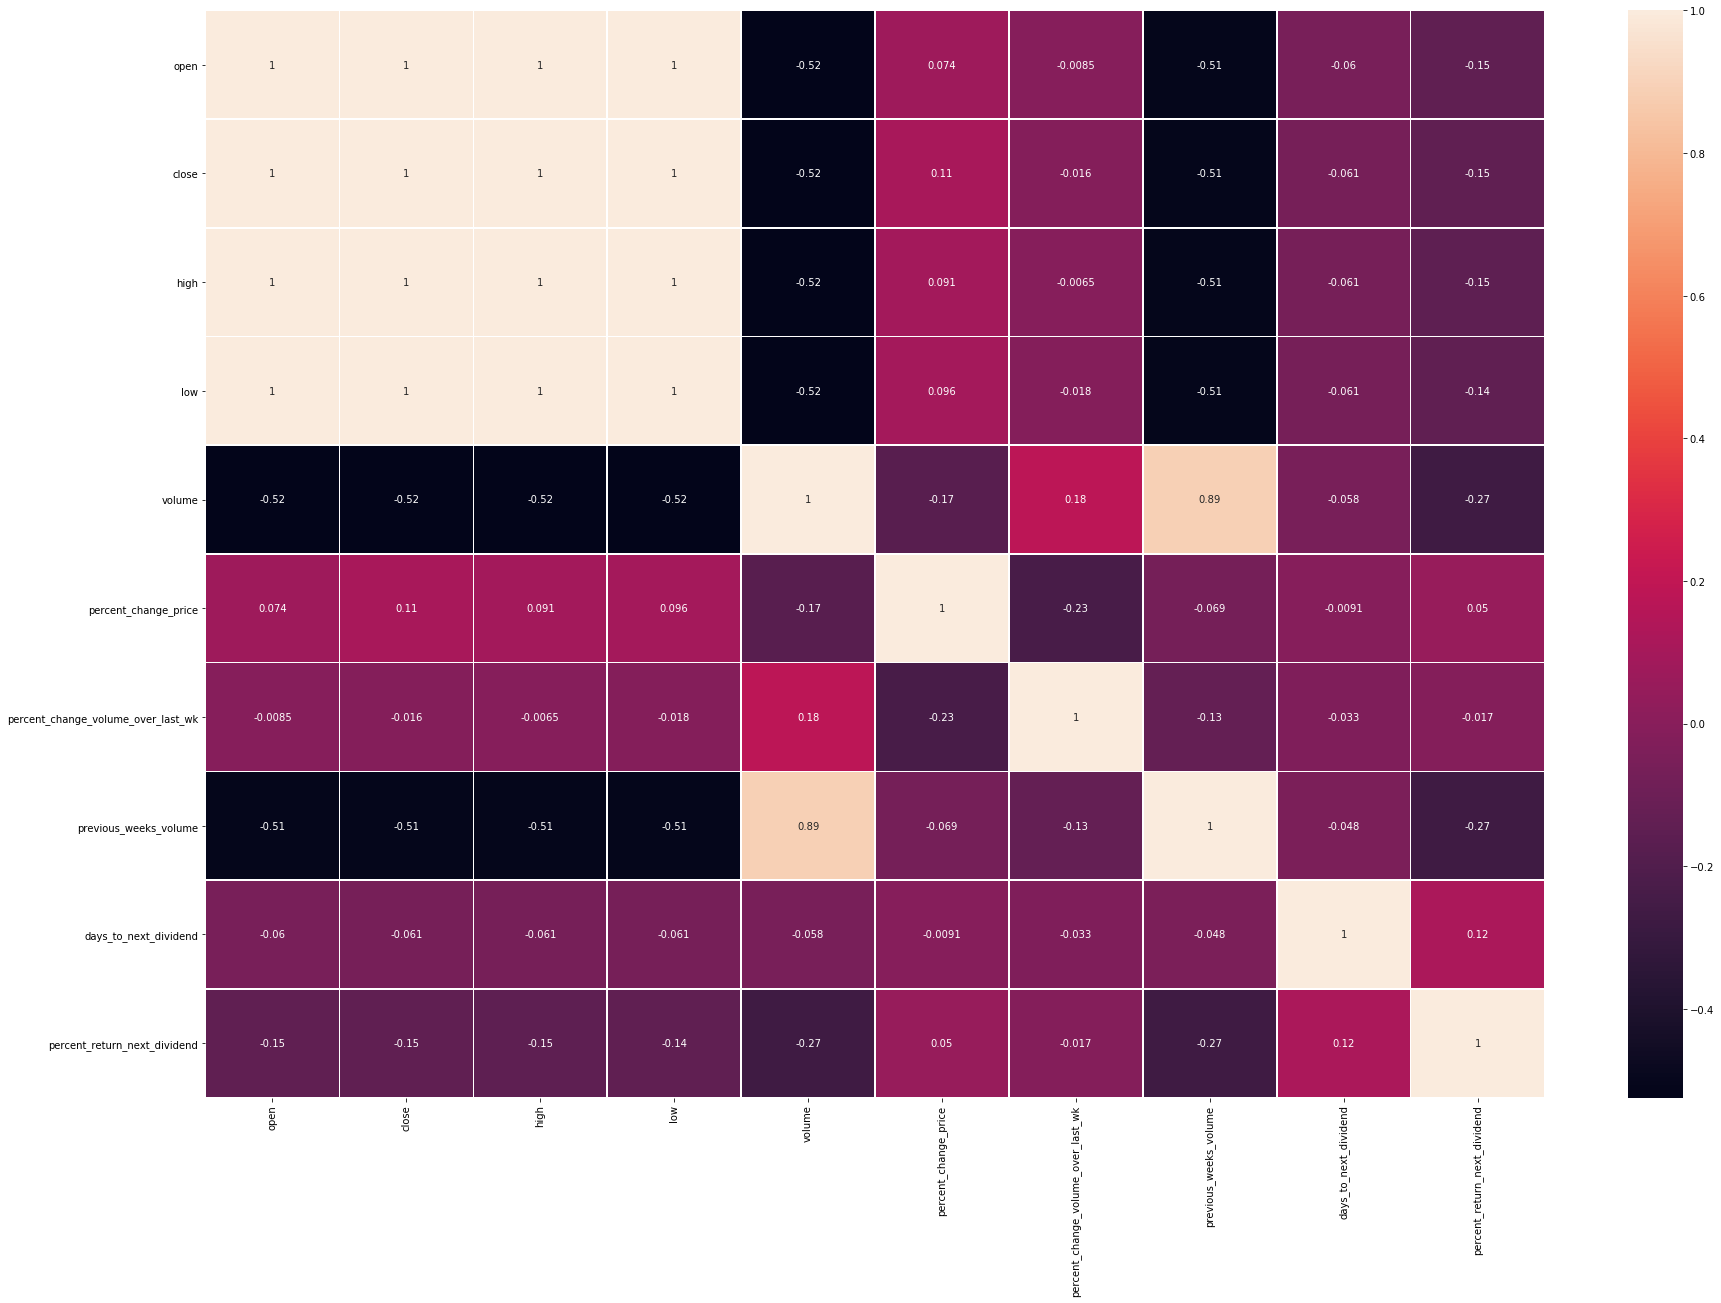

In [18]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True,linewidth=0.5)

In [19]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]


In [20]:
to_drop

['close', 'high', 'low', 'previous_weeks_volume']

In [21]:
to_drop1=['high', 'low', 'previous_weeks_volume']

In [22]:
# Drop feat1ures 
df.drop(to_drop, axis=1, inplace=True)

In [23]:
X=df

### Train-test split

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=1)

Lets Implement few Classification techniques on the data above with price as target.


In [26]:
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Model Construction - Classification

**Ada Boost Algorithm**

In [27]:
adaboost = AdaBoostClassifier( DecisionTreeClassifier() , n_estimators= 10 , learning_rate= 1 )
adaboost.fit(X_train, y_train)

y_pred_ada = adaboost.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ada))



Accuracy: 0.5486111111111112


In [28]:
cnf_matrix = confusion_matrix(y_test, y_pred_ada)

Confusion matrix, without normalization
[[36 31]
 [34 43]]
Normalized confusion matrix
[[0.54 0.46]
 [0.44 0.56]]


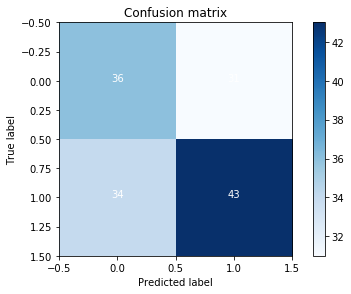

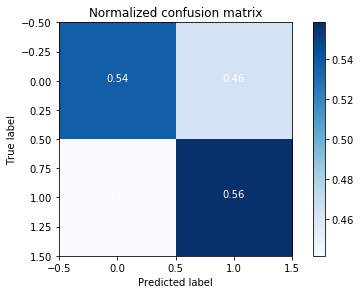

In [29]:

# Compute confusion matrix
np.set_printoptions(precision=2)
 
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix)
 #Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [30]:
print(classification_report(y_test, y_pred_ada))

# Better validation with K-fold.

scores_ada = cross_val_score(adaboost, X, Y, cv=10) # Ten-fold cross validation.
print(scores_ada)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores_ada.mean(), scores_ada.std() * 2))
# calculaye fpr, tpr
fpr_ada, tpr_ada, thresholds_ada = metrics.roc_curve(y_test,  y_pred_ada)
# calculate Area Under the curve
auc_ada = metrics.roc_auc_score(y_test, y_pred_ada)

              precision    recall  f1-score   support

           0       0.51      0.54      0.53        67
           1       0.58      0.56      0.57        77

    accuracy                           0.55       144
   macro avg       0.55      0.55      0.55       144
weighted avg       0.55      0.55      0.55       144

[0.58 0.44 0.53 0.53 0.46 0.47 0.42 0.56 0.38 0.49]
Accuracy: 0.48 (+/- 0.12)


**Decision Tree**

In [31]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Lets do some tuning to refine the results**

In [32]:
model1=tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
model1.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
y_predict = model1.predict(X_test)

In [35]:
cnf_matrix = confusion_matrix(y_test, y_predict)
cnf_matrix

array([[28, 39],
       [24, 53]], dtype=int64)

In [36]:

accuracy_score(y_test, y_predict)

0.5625

In [37]:
model1.score(X_train, y_train)

0.6354166666666666

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


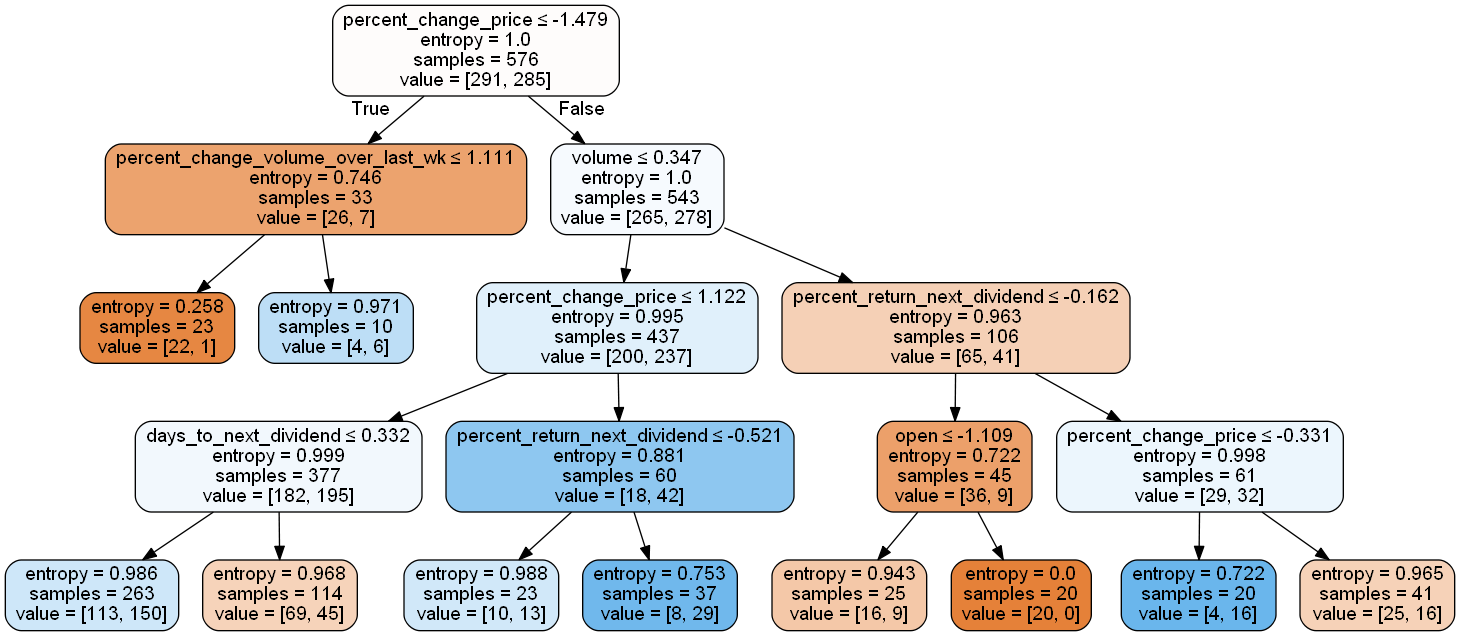

In [38]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model1, out_file=dot_data,feature_names=X_train.columns,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [39]:
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.5416666666666666

In [42]:

scores = cross_val_score(model1, X_train, y_train, cv=10)
scores

array([0.55, 0.47, 0.53, 0.53, 0.55, 0.48, 0.56, 0.54, 0.54, 0.53])

In [43]:

cnf_matrix = confusion_matrix(y_test, y_predict)
cnf_matrix

array([[38, 29],
       [37, 40]], dtype=int64)

**SVM & K Nearest Neighbour**



** After Tuning**

In [0]:
SVC_model = SVC()
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=5)

In [0]:
SVC_model=SVC(C=2,degree=1,probability=True,max_iter=10000,tol=0.00001, verbose=False)

In [57]:
SVC_model.fit(X_train, y_train)


SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='rbf',
    max_iter=10000, probability=True, random_state=None, shrinking=True,
    tol=1e-05, verbose=False)

In [58]:
SVC_model.score(X_test,y_test)

0.5138888888888888

In [59]:
SVC_model.score(X_train,y_train)

0.6475694444444444

In [0]:
y_pred_proba = SVC_model.predict_proba(X_test)[:,1]

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

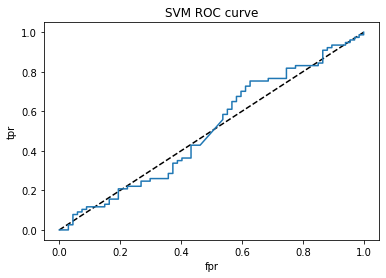

In [62]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='SVM')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('SVM ROC curve')
plt.show()

In [63]:
y_pred = SVC_model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[31, 36],
       [34, 43]])

**KNeighborsClassifier**


In [0]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

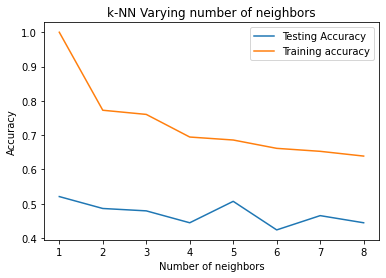

In [65]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [0]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=3)

In [67]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [68]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.4791666666666667

In [0]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [70]:
confusion_matrix(y_test,y_pred)

array([[35, 32],
       [43, 34]])

In [71]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,35,32,67
1,43,34,77
All,78,66,144


In [0]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [0]:
from sklearn.metrics import roc_curve

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

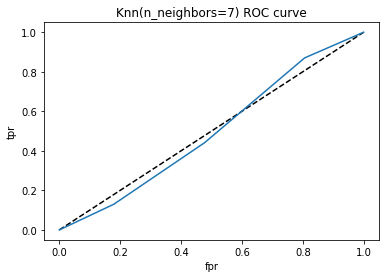

In [75]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [76]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.493700329521225

In [0]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [0]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

**KNN with Grid Search**

In [79]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [80]:
knn_cv.best_score_

0.5305555555555556

In [81]:
knn_cv.best_params_


{'n_neighbors': 46}

**GaussianNB() Logistics Regression**

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

gnb = GaussianNB()
gnb.fit(X_train, y_train)
Y_gnb_score = gnb.predict_proba(X_test)
lr = LogisticRegression() 
lr.fit(X_train, y_train)
Y_lr_score = lr.decision_function(X_test)

In [83]:
gnb.score(X_train,y_train)

0.5347222222222222

In [0]:
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, Y_gnb_score[:, 1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, Y_lr_score)

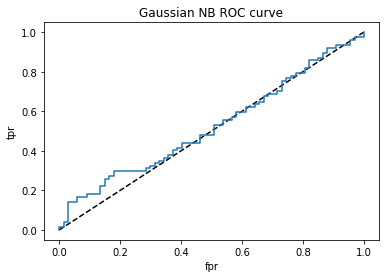

In [85]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_gnb,tpr_gnb, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Gaussian NB ROC curve')
plt.show()

In [86]:
lr.score(X_train,y_train)

0.5416666666666666

In [0]:
y_pred = lr.predict(X_test)

In [88]:
confusion_matrix(y_test,y_pred)

array([[33, 34],
       [29, 48]])

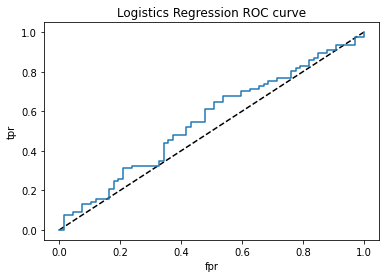

In [89]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_lr,tpr_lr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logistics Regression ROC curve')
plt.show()

In [90]:
clf1 = GaussianNB()
clf1.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred = clf1.predict(X_test)

In [92]:
confusion_matrix(y_test,y_pred)

array([[17, 50],
       [18, 59]])

In [93]:
GaussianNB()
print(clf1.predict(X_test))

[0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0
 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1]


In [94]:
clf1.score(X_train,y_train)

0.5347222222222222

In [95]:
clf1.score(X_test,y_test)

0.5277777777777778

**Neual Network**

In [96]:
import pandas as pd
import numpy as np
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Dense
#create model
#model = Sequential()

In [98]:
n_cols = X_train.shape[1]
n_cols

6

In [0]:
model1 = Sequential([
    Dense(1, input_shape=(n_cols,), activation="relu"),
    Dense(1, activation="sigmoid")
])


In [100]:
model1.summary()
#model1.get_weights()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 7         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [101]:
model1.get_weights()

[array([[-0.39],
        [-0.06],
        [ 0.54],
        [-0.34],
        [-0.86],
        [-0.4 ]], dtype=float32),
 array([0.], dtype=float32),
 array([[-0.39]], dtype=float32),
 array([0.], dtype=float32)]

In [102]:
# Fit(Train) the Model

# Compile the model with Optimizer, Loss Function and Metrics
# Roc-Auc is not available in Keras as an off the shelf metric yet, so we will skip it here.
SGD=keras.optimizers.SGD(lr=0.003)
model1.compile(SGD, "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)
# the fit function returns the run history. 
# It is very convenient, as it contains information about the model fit, iterations etc.

Train on 576 samples, validate on 144 samples
Epoch 1/100
576/576 [==============================] - 0s 489us/step - loss: 0.7053 - accuracy: 0.4566 - val_loss: 0.7004 - val_accuracy: 0.5208
Epoch 2/100
576/576 [==============================] - 0s 46us/step - loss: 0.7050 - accuracy: 0.4809 - val_loss: 0.7001 - val_accuracy: 0.5208
Epoch 3/100
576/576 [==============================] - 0s 46us/step - loss: 0.7047 - accuracy: 0.4826 - val_loss: 0.6998 - val_accuracy: 0.5208
Epoch 4/100
576/576 [==============================] - 0s 58us/step - loss: 0.7044 - accuracy: 0.4844 - val_loss: 0.6995 - val_accuracy: 0.5139
Epoch 5/100
576/576 [==============================] - 0s 47us/step - loss: 0.7042 - accuracy: 0.4844 - val_loss: 0.6992 - val_accuracy: 0.5139
Epoch 6/100
576/576 [==============================] - 0s 49us/step - loss: 0.7039 - accuracy: 0.4861 - val_loss: 0.6990 - val_accuracy: 0.5139
Epoch 7/100
576/576 [==============================] - 0s 57us/step - loss: 0.7036 - accu

In [0]:
y_pred = model1.predict_classes(X_test)
y_pred_prob = model1.predict(X_test)

In [0]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.549
roc-auc is 0.531


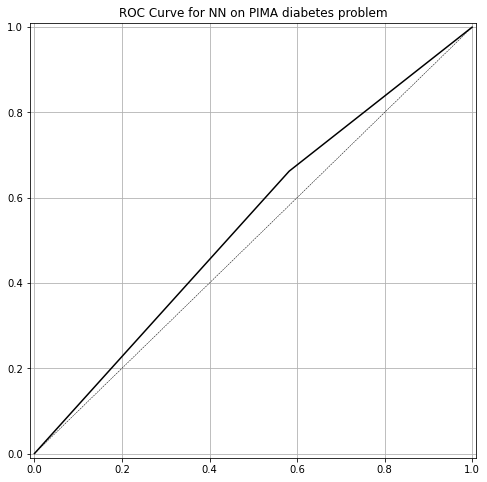

In [105]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob)))

plot_roc(y_test, y_pred, 'NN')


In [106]:
run_hist_1.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

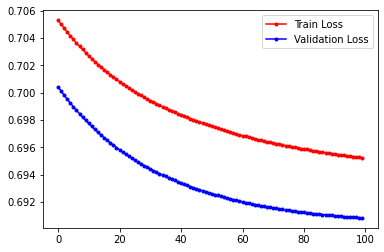

In [107]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [108]:
matrix =confusion_matrix(y_test, y_pred)
matrix

array([[28, 39],
       [26, 51]])

In [109]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Precision: 0.5666666666666667
Recall: 0.6623376623376623
Accuracy: 0.5486111111111112


In [110]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.52      0.42      0.46        67
     class 1       0.57      0.66      0.61        77

    accuracy                           0.55       144
   macro avg       0.54      0.54      0.54       144
weighted avg       0.54      0.55      0.54       144



In [0]:
model_2 = Sequential([
    Dense(32, input_shape=(n_cols,), activation="tanh"),
    Dense(32, activation="tanh"),Dense(32, activation="sigmoid"),Dense(128, activation="tanh"),
                                  Dense(128, activation="sigmoid"),Dense(128, activation="tanh"),Dense(1, activation="sigmoid")])



In [112]:
model_2.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                224       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [113]:
model_2.get_weights()

[array([[-2.60e-01,  1.93e-01, -5.35e-02, -1.78e-01,  2.42e-01, -1.40e-01,
         -2.19e-01, -3.30e-01,  2.18e-01,  1.67e-03, -6.02e-02, -3.45e-01,
          2.64e-01, -7.53e-02,  2.70e-01, -2.08e-01,  1.58e-01, -1.72e-01,
         -2.24e-01, -2.91e-01, -2.66e-01, -3.58e-01,  5.76e-02,  3.14e-02,
          1.96e-01, -2.36e-01,  2.02e-01,  2.45e-01,  1.07e-01, -6.46e-02,
         -4.48e-02, -1.76e-01],
        [ 4.76e-02,  1.96e-01, -7.99e-02,  2.07e-01, -1.41e-01, -2.60e-01,
          3.97e-01,  1.37e-01, -7.55e-02, -2.05e-02,  3.32e-01,  2.14e-01,
         -3.74e-01,  3.08e-01, -3.92e-01,  3.74e-01, -2.99e-01,  3.68e-01,
         -1.43e-01, -2.78e-02, -5.87e-02,  1.20e-01, -1.11e-01, -2.99e-01,
          7.61e-02,  3.01e-01,  1.10e-01, -9.70e-02,  1.65e-01, -3.54e-01,
         -1.10e-01, -3.58e-01],
        [-3.33e-01,  9.48e-02, -2.32e-01,  1.88e-01, -2.23e-01, -3.88e-01,
          1.52e-01, -3.59e-01, -2.33e-01,  1.82e-01,  2.70e-01,  2.18e-03,
         -2.09e-01,  2.24e-01, -1.56

In [118]:


# Compile the model with Optimizer, Loss Function and Metrics
# Roc-Auc is not available in Keras as an off the shelf metric yet, so we will skip it here.
Adam=keras.optimizers.Adam(lr=0.001)
model_2.compile(Adam, "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000)
# the fit function returns the run history. 
# It is very convenient, as it contains information about the model fit, iterations etc.

Train on 576 samples, validate on 144 samples
Epoch 1/1000
576/576 [==============================] - 0s 412us/step - loss: 0.7044 - accuracy: 0.5417 - val_loss: 0.7046 - val_accuracy: 0.5347
Epoch 2/1000
576/576 [==============================] - 0s 75us/step - loss: 0.6921 - accuracy: 0.5312 - val_loss: 0.6949 - val_accuracy: 0.5000
Epoch 3/1000
576/576 [==============================] - 0s 78us/step - loss: 0.7019 - accuracy: 0.4948 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 4/1000
576/576 [==============================] - 0s 83us/step - loss: 0.6837 - accuracy: 0.5486 - val_loss: 0.7045 - val_accuracy: 0.5417
Epoch 5/1000
576/576 [==============================] - 0s 83us/step - loss: 0.6859 - accuracy: 0.5729 - val_loss: 0.7085 - val_accuracy: 0.4931
Epoch 6/1000
576/576 [==============================] - 0s 72us/step - loss: 0.6907 - accuracy: 0.5451 - val_loss: 0.6968 - val_accuracy: 0.5486
Epoch 7/1000
576/576 [==============================] - 0s 76us/step - loss: 0.6846

In [0]:
y_pred2 = model_2.predict_classes(X_test)
y_pred_prob2 = model_2.predict(X_test)

In [115]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.47      1.00      0.64        67
     class 1       0.00      0.00      0.00        77

    accuracy                           0.47       144
   macro avg       0.23      0.50      0.32       144
weighted avg       0.22      0.47      0.30       144



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy is 0.465
roc-auc is 0.492


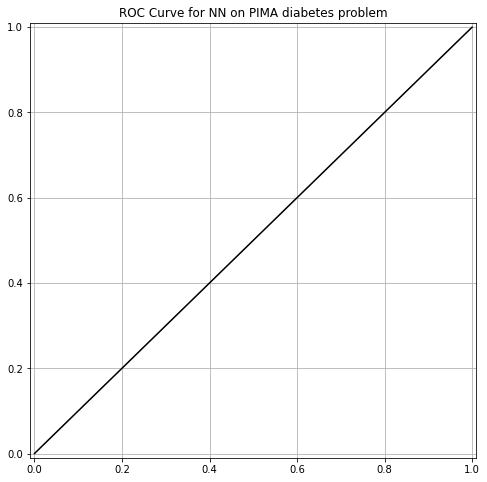

In [116]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob2)))

plot_roc(y_test, y_pred2, 'NN')

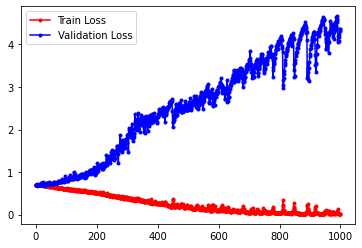

In [119]:
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [120]:
matrix =confusion_matrix(y_test, y_pred2)
matrix

array([[67,  0],
       [77,  0]])